In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
#train_test_split를 정의 해줘야 하기에 아래 라이브러리 만들어줍니다.
from sklearn.model_selection import train_test_split
#경고창 삭제하기
import warnings
warnings.filterwarnings('ignore')


#폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [5]:
!pip install graphviz

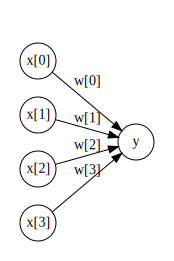

In [6]:
#다중 퍼셉트론 =신경망
import mglearn

display(mglearn.plots.plot_logistic_regression_graph())

In [7]:
#mlp는 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습이다
#왼쪽 노드는 입력 특성을 나타내며 연결선은 학습된 계수를 표현하고 ㅗ른쪽 노드는 입력긔 가중치 합, 즉 출력이다
#MLP에서는 가중치 합을 만드는 과정이 여러 번 반복되며, 먼저 중간 단꼐를 구성하는 은닉유닛을 계산 후 최종 결관 산출

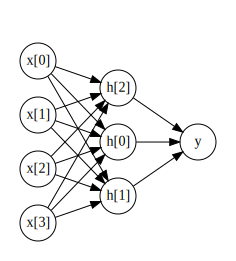

In [8]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'tanh(X),lelu(x)')

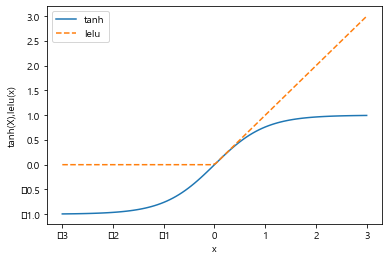

In [12]:
#유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수인 하이퍼볼릭 탄젠트를 적용한다.또는 렐루
line = np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label="tanh")
plt.plot(line,np.maximum(line,0),linestyle='--',label="lelu")
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("tanh(X),lelu(x)")


In [ ]:
#렐루는 0 이하를 잘라버리고 tanh 함수는 낮은 값은 -1 로 높은 갓은 +1로 수렴한다
#이 비선형 함수를 이용해 신경망이 선형 모델에서보다 훨씬 더 복잡한 함수를 학습이 가능하다

Text(0, 0.5, '특성 1')

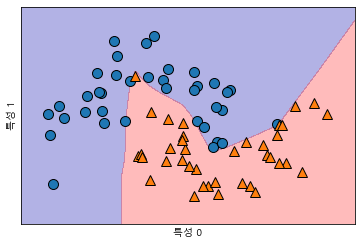

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons


X,y = make_moons(n_samples= 100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

mlp= MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)

mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [ ]:
#그림과 같이 이 신경망은 매우 비선형적이지만 비교적 매끄러운 결정경계를 가졌다

Text(0, 0.5, '특성 1')

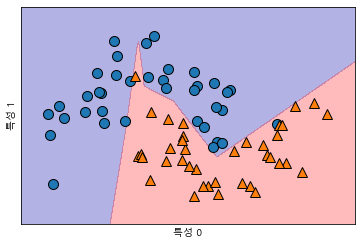

In [16]:

X,y = make_moons(n_samples= 100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

mlp= MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10],max_iter=1000).fit(X_train,y_train)

mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [ ]:
#mlp의 기본값으로 은닉 유닛을 100개 사용하는데 은닉 유닛의 개수를 10로 줄이며 모델의 복잡도는 낮아지고 여전히 좋은 결과를 얻는다
#기본 비선형 함수는 렐루 이며 더 매끄러운 함수는 tanh를 이용해 만들면 된다.


Text(0, 0.5, '특성 1')

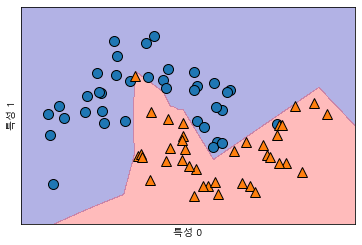

In [17]:
#두개의 은닉 층
X,y = make_moons(n_samples= 100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

mlp= MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10],max_iter=1000).fit(X_train,y_train)

mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

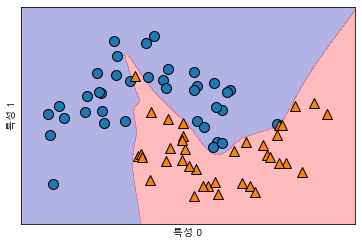

In [20]:
#10개의 은닉 유닛을 가진 두개의 은닉층과 tanh 활성함 함수 이용
X,y = make_moons(n_samples= 100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)
#tanh 함수 activation에 추가
mlp= MLPClassifier(solver='lbfgs',activation='tanh',
                   random_state=0,hidden_layer_sizes=[10,10],max_iter=1000).fit(X_train,y_train)

mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

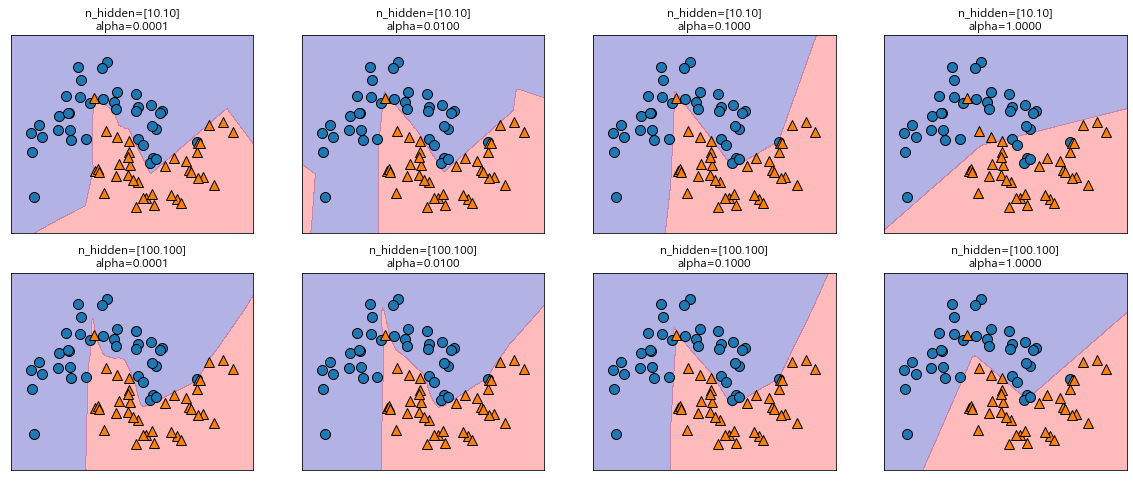

In [21]:
#mlp의 모델의 복잡도를 제어하는 방법은 선형 회귀 모델과 똑같이 alpha 를 조절하면 된다.

fig,axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp= MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],max_iter=1000
                          ,alpha=alpha).fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{}.{}]\nalpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))


In [ ]:
#alpha가 커질수록 모델의 복잡도는 낮아 보이네요!

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data,cancer.target,random_state=0)
print("유방암 데이터의 특성별 최댓값:\n",cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [28]:
mlp= MLPClassifier(random_state=42).fit(X_train,y_train)

print("훈련 세트 점수: {: .2f}".format(mlp.score(X_train,y_train)))
print("테스트 세트 점수: {: .2f}".format(mlp.score(X_test,y_test)))

훈련 세트 점수:  0.94
테스트 세트 점수:  0.92


In [33]:
#유방암 데이터 셋에 적응을 시켜 보았을 때 테스트정확도는 높지만 다른 모델보다는 아니다
#svc처럼 데이터 전처리를 해주어야 한다. 왜냐하면 데이터의 스케일에 영향을 미치기 때문이다
#또 전처리를 시켜볼게요..



mean_on_train = X_train.mean(axis=0)
#이번에는 각 훈련세트 특성의 평균을 계산
std_on_train =X_train.std(axis=0)
#또 특성들의 표준편차를 계산해줍니다

#데이터에 ㅍㅇ균을 빼고 표준편차를 나누면
#평균 0, 표준편차 1인 데이터로 변환됩니다.

X_train_scaled =(X_train-mean_on_train)/std_on_train

#테스트 데이터도 변화 시켜볼게요

X_test_scaled =(X_test-mean_on_train)/std_on_train
mlp= MLPClassifier(random_state=42).fit(X_train_scaled,y_train)

print("훈련 세트 점수: {: .3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 점수: {: .3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 점수:  0.993
테스트 세트 점수:  0.965


In [ ]:
#전처리 시키 확실히 더 성능이 좋아졌습니다. 반복횟수를 늘리면 더 좋은 결과를 얻을 겁니다

In [34]:
mlp= MLPClassifier(max_iter=1000,random_state=0).fit(X_train_scaled,y_train)

print("훈련 세트 점수: {: .3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 점수: {: .3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 점수:  1.000
테스트 세트 점수:  0.972


In [35]:
#하지만 훈련세트와 테스트 세트사이에는 성능 차이가 있으므로 일반화 성능을 더 올리기 위해 모델의 복잡도를 낮추겠습니다
#alpha를 건드리면 되겠죠! alpha가 클수록 모델의 복잡도는 낮아지니깐요!!!

mlp= MLPClassifier(max_iter=1000,alpha=1,random_state=0).fit(X_train_scaled,y_train)

print("훈련 세트 점수: {: .3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 점수: {: .3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 점수:  0.988
테스트 세트 점수:  0.972


In [ ]:
#장점
#충분한 시간과 데이터가 있으면 매우 복잡한 모델을 만들어 냄
#다른 알고리즘들을 압도하는 성능을 발휘(음성, 영상, 번역 등)
# 단점
# 데이터 전처리에 민감, 이종의 데이터 타입일 경우 잘 안 맞음
# 매개변수 튜닝이 매우 어려움